In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv('winequality-red.csv', sep=';')
data.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality']), data['quality'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [5]:
# Даже с учетом флуктуаций (без рэндом стейт) лучше всего описывает модель
# случайный лес, затем бэггинс, затем дерево решений

# DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.559375

In [6]:
clf = BaggingClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.64375

In [7]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.659375

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality']), data['quality'], test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [10]:
a = []
b = [10, 50, 100] + [i for i in range(200,5001,200)]

for j in b:
    clf = RandomForestClassifier(n_estimators=j, random_state=42)
    clf.fit(X_train, y_train)
    a.append(clf.score(X_test, y_test))

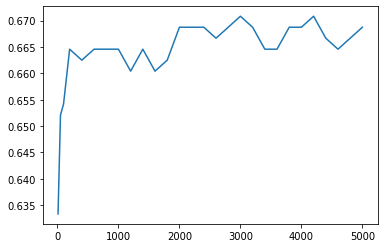

In [15]:
import matplotlib.pyplot as plt
plt.plot(b, a)
plt.show()

c:\Users\brigh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


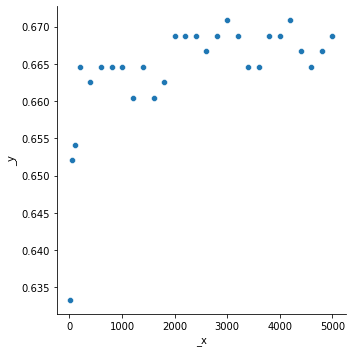

In [18]:
import seaborn as sns
sns.relplot(b,a)

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [64]:
clf = GradientBoostingClassifier()
cross_val_score(clf, X_train, y_train).mean()

0.6417000320307495

In [47]:
# Для xgb необходимо переклассифицировать y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_0 = le.fit_transform(y_train)

In [61]:
pd.DataFrame(y_train_0).iloc[:,0].unique()

array([4, 2, 3, 0, 5, 1], dtype=int64)

In [65]:
#dtrain = xgb.DMatrix(data=X_train, label=y_train)
params={'booster':'gbtree'}
# clf = xgb.train(dtrain=dtrain, params=params)
# xgb.cv(dtrain=dtrain, params=params, nfold=5, seed=42) Просто возвращает ошибки rmse
clf = xgb.XGBClassifier(**params)
cross_val_score(clf, X_train, y_train_0).mean()

0.643461723254324

In [ ]:
# Значение по xgb выше на 0,2%, однако необходимо учитывать что по умолчанию в sklearn estimator=DummyEstimator
# Насколько понял, GB по описанию параметров в sklearn уже подразумевает бустинг по деревьям,
#   тогда что представляет init c estimator=DummyEstimator? 

In [67]:
clf_0 = DecisionTreeClassifier()
clf = GradientBoostingClassifier(init=clf_0)
cross_val_score(clf, X_train, y_train).mean()

0.5978579436258808

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [68]:
# В конце домащки понял что начал работать с cv=5, не стал переделывать..
y_test_0 = le.fit_transform(y_test)

In [76]:
np.arange(25, 126, 25)

array([ 25,  50,  75, 100, 125])

In [157]:
from sklearn.pipeline import Pipeline

clf_1 = GradientBoostingClassifier()
params={}
clf_2 = xgb.XGBClassifier(**params)

pipeline = Pipeline([('clf', GradientBoostingClassifier())])

parameters = [
    {
        'clf': (clf_1, clf_2),
        'clf__learning_rate': np.arange(0.1, 1, 0.2),
        'clf__max_depth': np.arange(3, 10, 3),
        'clf__n_estimators': np.arange(50, 151, 50),
    }
]

grid_search_1 = GridSearchCV(pipeline, parameters)
grid_search_1.fit(X_train, y_train_0)
best_clf_1 = grid_search_1.best_estimator_

best_clf_1.score(X_test, y_test_0)

0.625

In [159]:
best_clf_1.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('clf',
                 GradientBoostingClassifier(learning_rate=0.30000000000000004,
                                            max_depth=9, n_estimators=50))])>

In [160]:
%%time
clf = GradientBoostingClassifier()

parameters = [
    {
        'learning_rate': np.arange(0.1, 1, 0.2),
        'max_depth': np.arange(3, 10, 3),
        'n_estimators': np.arange(50, 151, 50),
    }
]

grid_search_2 = GridSearchCV(clf, parameters)
grid_search_2.fit(X_train, y_train_0)
best_clf_2 = grid_search_2.best_estimator_

best_clf_2.score(X_test, y_test_0)

CPU times: total: 8min 41s
Wall time: 8min 55s


0.6354166666666666

In [172]:
# В пайплайне и gridSearch без пайплайна отбираются идентичные параметры GB,
#   почему отличие в accuracy?
best_clf_2.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=9,
                           n_estimators=50)>

In [174]:
clf = xgb.XGBClassifier(**params)

parameters = [
    {
        'learning_rate': np.arange(0.1, 1, 0.2),
        'max_depth': np.arange(3, 10, 3),
        'n_estimators': np.arange(50, 151, 50),
    }
]

grid_search_3 = GridSearchCV(clf, parameters)
grid_search_3.fit(X_train, y_train_0)
best_clf_3 = grid_search_3.best_estimator_

best_clf_3.score(X_test, y_test_0)

0.6625

In [198]:
cross_val_score(best_clf_3, X_train, y_train_0).mean()

0.6640414798206278

In [177]:
# XGB работает в неск.раз быстрее
# XGB с лучшим accuracy, не смог понять, в связи с чем пайплайн отобрал GB sklearn?
# Пайплайн чисто с XGB выдает как лучший клас-ор GB из sklearn, в этом проблема, но почему?
# Ошибки в коде нет, перезапускал

params={}
pipeline = Pipeline([('clf', xgb.XGBClassifier(**params))])

parameters = [
    {
        'clf__learning_rate': np.arange(0.1, 1, 0.2),
        'clf__max_depth': np.arange(3, 10, 3),
        'clf__n_estimators': np.arange(50, 151, 50),
    }
]

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(X_train, y_train_0)
best_clf = grid_search_1.best_estimator_

best_clf.score(X_test, y_test_0)

0.625

In [175]:
best_clf_3.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)>

In [178]:
best_clf.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('clf',
                 GradientBoostingClassifier(learning_rate=0.30000000000000004,
                                            max_depth=9, n_estimators=50))])>

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [13]:
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool

In [107]:
# CV от lgb не имеет метрики accuracy, только средний precision
train_data = lgb.Dataset(X_train, label=y_train_0)
param = {}
pd.DataFrame(lgb.cv(param, train_data, num_boost_round=100, nfold=5, metrics='average_precision'))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Warning] Auto-choosing col-wise multi-thr

,average_precision-mean,average_precision-stdv
0,0.998142,0.001712
1,0.998548,0.001405
2,0.998618,0.001373
3,0.998571,0.001335
4,0.998780,0.001404
...,...,...
95,0.998293,0.002295
96,0.998277,0.002283
97,0.998281,0.002298
98,0.998289,0.002317


In [108]:
clf = lgb.LGBMClassifier()
cross_val_score(clf, X_train, y_train_0).mean()

0.6398822869955157

In [109]:
clf = CatBoostClassifier()
cross_val_score(clf, X_train, y_train_0).mean()

Learning rate set to 0.07868
0:	learn: 1.6918227	total: 1.15s	remaining: 19m 12s
1:	learn: 1.6118156	total: 1.16s	remaining: 9m 40s
2:	learn: 1.5370502	total: 1.18s	remaining: 6m 30s
3:	learn: 1.4697136	total: 1.18s	remaining: 4m 54s
4:	learn: 1.4136508	total: 1.2s	remaining: 3m 59s
5:	learn: 1.3663810	total: 1.21s	remaining: 3m 20s
6:	learn: 1.3168809	total: 1.22s	remaining: 2m 53s
7:	learn: 1.2771113	total: 1.23s	remaining: 2m 32s
8:	learn: 1.2424386	total: 1.24s	remaining: 2m 16s
9:	learn: 1.2107617	total: 1.25s	remaining: 2m 4s
10:	learn: 1.1825604	total: 1.26s	remaining: 1m 53s
11:	learn: 1.1570028	total: 1.27s	remaining: 1m 44s
12:	learn: 1.1355291	total: 1.28s	remaining: 1m 37s
13:	learn: 1.1129305	total: 1.29s	remaining: 1m 30s
14:	learn: 1.0926217	total: 1.3s	remaining: 1m 25s
15:	learn: 1.0767884	total: 1.31s	remaining: 1m 20s
16:	learn: 1.0573778	total: 1.32s	remaining: 1m 16s
17:	learn: 1.0407440	total: 1.33s	remaining: 1m 12s
18:	learn: 1.0257373	total: 1.34s	remaining: 1m

0.6640414798206278

In [ ]:
# Лучшие результаты по CV mean в порядке убывания: catboost, xgb, sklearn, lgb

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [193]:
# Accuracy (от лучшего): xgb, lgb, catboost, gb; LR: gb=0.3, lgb=xgb=0.1 
# GridSearch не отбирает lr в lgb, и не отображает параметры в catboost,
#  оказалось не отображаемые параметры - дефолтные в lgb

clf = lgb.LGBMClassifier()

parameters = [
    {
        'learning_rate': np.arange(0.1, 1, 0.2),
        'max_depth': np.arange(3, 10, 3),
        'n_estimators': np.arange(50, 151, 50),
    }
]

grid_search_4 = GridSearchCV(clf, parameters)
grid_search_4.fit(X_train, y_train_0)
best_clf_4 = grid_search_4.best_estimator_

best_clf_4.score(X_test, y_test_0)

0.64375

In [194]:
best_clf_4.get_params

<bound method LGBMModel.get_params of LGBMClassifier(max_depth=9, n_estimators=50)>

In [195]:
clf = CatBoostClassifier()

parameters = [
    {
        'learning_rate': np.arange(0.1, 1, 0.2),
        'max_depth': np.arange(3, 10, 3),
        'n_estimators': np.arange(50, 151, 50),
    }
]

grid_search_5 = GridSearchCV(clf, parameters)
grid_search_5.fit(X_train, y_train_0)
best_clf_5 = grid_search_5.best_estimator_

best_clf_5.score(X_test, y_test_0)

0:	learn: 1.6780775	total: 2.56ms	remaining: 126ms
1:	learn: 1.5627926	total: 4.98ms	remaining: 119ms
2:	learn: 1.4764325	total: 7.17ms	remaining: 112ms
3:	learn: 1.4059100	total: 9.29ms	remaining: 107ms
4:	learn: 1.3503414	total: 11.1ms	remaining: 99.7ms
5:	learn: 1.3035730	total: 13.3ms	remaining: 97.7ms
6:	learn: 1.2661980	total: 15.4ms	remaining: 94.8ms
7:	learn: 1.2285048	total: 17.3ms	remaining: 90.9ms
8:	learn: 1.1889108	total: 19.4ms	remaining: 88.5ms
9:	learn: 1.1588994	total: 21.6ms	remaining: 86.6ms
10:	learn: 1.1337418	total: 23.7ms	remaining: 83.9ms
11:	learn: 1.1128834	total: 25.6ms	remaining: 81.1ms
12:	learn: 1.0944116	total: 29.7ms	remaining: 84.5ms
13:	learn: 1.0795555	total: 31.6ms	remaining: 81.3ms
14:	learn: 1.0607744	total: 33.6ms	remaining: 78.4ms
15:	learn: 1.0440641	total: 35.4ms	remaining: 75.3ms
16:	learn: 1.0312941	total: 37.4ms	remaining: 72.5ms
17:	learn: 1.0199728	total: 39.1ms	remaining: 69.6ms
18:	learn: 1.0091762	total: 40.9ms	remaining: 66.8ms
19:	lea

0.6395833333333333

In [ ]:
best_clf_5.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostClassifier object at 0x000002AB8F9732E0>>

In [204]:
# Действительно, параметры catboost не выводятся, почему?
clf = CatBoostClassifier(learning_rate=1, max_depth=3)

grid_search_5_0 = GridSearchCV(clf, parameters)
grid_search_5_0.fit(X_train, y_train_0)
best_clf_5_0 = grid_search_5_0.best_estimator_

print(best_clf_5_0.score(X_test, y_test_0))
print(best_clf_5_0.get_params)

0:	learn: 1.6780775	total: 3.25ms	remaining: 159ms
1:	learn: 1.5627926	total: 5.45ms	remaining: 131ms
2:	learn: 1.4764325	total: 7.41ms	remaining: 116ms
3:	learn: 1.4059100	total: 9.26ms	remaining: 107ms
4:	learn: 1.3503414	total: 11.6ms	remaining: 104ms
5:	learn: 1.3035730	total: 14.2ms	remaining: 104ms
6:	learn: 1.2661980	total: 16.1ms	remaining: 99.2ms
7:	learn: 1.2285048	total: 18.4ms	remaining: 96.4ms
8:	learn: 1.1889108	total: 20.4ms	remaining: 92.9ms
9:	learn: 1.1588994	total: 22.3ms	remaining: 89.3ms
10:	learn: 1.1337418	total: 24.1ms	remaining: 85.6ms
11:	learn: 1.1128834	total: 26.1ms	remaining: 82.6ms
12:	learn: 1.0944116	total: 28.7ms	remaining: 81.7ms
13:	learn: 1.0795555	total: 30.7ms	remaining: 78.9ms
14:	learn: 1.0607744	total: 33.6ms	remaining: 78.4ms
15:	learn: 1.0440641	total: 35.7ms	remaining: 75.8ms
16:	learn: 1.0312941	total: 38ms	remaining: 73.8ms
17:	learn: 1.0199728	total: 39.9ms	remaining: 70.9ms
18:	learn: 1.0091762	total: 42.5ms	remaining: 69.4ms
19:	learn: 

In [205]:
# Рассмотри какую модель мы бы выбрали по CV на train (порядок по убыв. accuracy: xgb, lgb, catboost, gb)
# Вывод: выбрали бы не самый лучший catboost
# Как убрать вывод обучения в аутпут по catboost?

print(
    cross_val_score(best_clf_3, X_train, y_train_0).mean(),
    cross_val_score(best_clf_4, X_train, y_train_0).mean(),
    cross_val_score(best_clf_5, X_train, y_train_0).mean(),
    cross_val_score(best_clf_2, X_train, y_train_0).mean(), sep='\n'
)


0:	learn: 1.6928101	total: 96.4ms	remaining: 14.4s
1:	learn: 1.6018729	total: 180ms	remaining: 13.3s
2:	learn: 1.5299417	total: 270ms	remaining: 13.2s
3:	learn: 1.4527891	total: 365ms	remaining: 13.3s
4:	learn: 1.3929337	total: 460ms	remaining: 13.3s
5:	learn: 1.3412004	total: 559ms	remaining: 13.4s
6:	learn: 1.2931663	total: 643ms	remaining: 13.1s
7:	learn: 1.2400303	total: 744ms	remaining: 13.2s
8:	learn: 1.1984455	total: 840ms	remaining: 13.2s
9:	learn: 1.1656196	total: 936ms	remaining: 13.1s
10:	learn: 1.1336462	total: 1.02s	remaining: 13s
11:	learn: 1.1002213	total: 1.11s	remaining: 12.8s
12:	learn: 1.0697339	total: 1.21s	remaining: 12.7s
13:	learn: 1.0424485	total: 1.3s	remaining: 12.7s
14:	learn: 1.0203784	total: 1.39s	remaining: 12.6s
15:	learn: 0.9977470	total: 1.49s	remaining: 12.5s
16:	learn: 0.9787899	total: 1.58s	remaining: 12.4s
17:	learn: 0.9602282	total: 1.67s	remaining: 12.2s
18:	learn: 0.9440943	total: 1.77s	remaining: 12.2s
19:	learn: 0.9251253	total: 1.86s	remaining

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [149]:
from hyperopt import fmin, tpe, hp, space_eval
best = fmin(fn=lambda x: x ** 2,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|██████████| 100/100 [00:00<00:00, 185.29trial/s, best loss: 0.00012689594571241278]
{'x': -0.011264810061089037}


In [147]:
params={}

def objective(params):
    clf = xgb.XGBClassifier(**params)
    cv_score = cross_val_score(clf, X_train, y_train_0).mean()
    return -cv_score

space = {
    'learning_rate': hp.choice('learning_rate', np.arange(0.1, 1, 0.2)),
    'max_depth': hp.choice('max_depth', np.arange(3, 10, 3)),
    'n_estimators': hp.choice('n_estimators', np.arange(50, 151, 50))
}

best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|██████████| 100/100 [05:05<00:00,  3.06s/trial, best loss: -0.6640414798206278]
{'learning_rate': 0, 'max_depth': 1, 'n_estimators': 1}


In [199]:
## check
params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100
}
clf = xgb.XGBClassifier(**params)
print(cross_val_score(clf, X_train, y_train_0).mean())
print(best_clf_3.score(X_test, y_test_0))


0.6640414798206278
0.6625


In [ ]:
# Скорость CV выше с hyperopt
# Наилучшие параметры такие же как в gridsearch:
#   'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [183]:
from sklearn.ensemble import StackingClassifier

params={}
estimators = [
    ('1', GradientBoostingClassifier()),
    ('2', xgb.XGBClassifier(**params)),
    ('3', lgb.LGBMClassifier()),
    ('4', CatBoostClassifier())
]

clf = StackingClassifier(estimators=estimators)

print(clf.fit(X_train, y_train_0).score(X_test, y_test_0))


Learning rate set to 0.079582
0:	learn: 1.6798836	total: 13.7ms	remaining: 13.7s
1:	learn: 1.5987518	total: 25.7ms	remaining: 12.8s
2:	learn: 1.5238132	total: 36.3ms	remaining: 12.1s
3:	learn: 1.4602113	total: 52.7ms	remaining: 13.1s
4:	learn: 1.4046420	total: 65.1ms	remaining: 13s
5:	learn: 1.3571609	total: 75ms	remaining: 12.4s
6:	learn: 1.3133440	total: 88ms	remaining: 12.5s
7:	learn: 1.2769983	total: 97.2ms	remaining: 12.1s
8:	learn: 1.2417352	total: 107ms	remaining: 11.8s
9:	learn: 1.2089482	total: 115ms	remaining: 11.4s
10:	learn: 1.1811884	total: 125ms	remaining: 11.2s
11:	learn: 1.1571506	total: 134ms	remaining: 11s
12:	learn: 1.1308868	total: 142ms	remaining: 10.8s
13:	learn: 1.1091579	total: 152ms	remaining: 10.7s
14:	learn: 1.0918378	total: 160ms	remaining: 10.5s
15:	learn: 1.0750740	total: 170ms	remaining: 10.4s
16:	learn: 1.0591980	total: 178ms	remaining: 10.3s
17:	learn: 1.0431556	total: 189ms	remaining: 10.3s
18:	learn: 1.0284858	total: 200ms	remaining: 10.3s
19:	learn: 

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [192]:
# Вывод: стэккинг по лучшим моделям хуже стэккинга по дефолтным
# Вопрос: passthrough по дефолту использует для обуч.след. модели результаты предыд,
#  тогда зачем устанавливать final_estimator, если модели сами стэкаются в процессе обуч?
#  и если passthrough=True то каким образом лог.регр-ия (является дефолтным final_estimator)
#  стэкает модели? выбирает наилучшую последовательность применения моделей?

params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100
}

estimators = [
    ('1', GradientBoostingClassifier(learning_rate=0.3, max_depth=9, n_estimators=50)),
    ('2', xgb.XGBClassifier(**params)),
    ('3', best_clf_4),
    ('4', best_clf_5)
]

clf = StackingClassifier(estimators=estimators)

print(clf.fit(X_train, y_train_0).score(X_test, y_test_0))

0:	learn: 1.6749749	total: 85.7ms	remaining: 12.8s
1:	learn: 1.5919167	total: 175ms	remaining: 12.9s
2:	learn: 1.5218786	total: 271ms	remaining: 13.3s
3:	learn: 1.4560166	total: 421ms	remaining: 15.4s
4:	learn: 1.3943489	total: 537ms	remaining: 15.6s
5:	learn: 1.3555146	total: 668ms	remaining: 16s
6:	learn: 1.3109733	total: 797ms	remaining: 16.3s
7:	learn: 1.2542635	total: 911ms	remaining: 16.2s
8:	learn: 1.2157271	total: 1.23s	remaining: 19.3s
9:	learn: 1.1779640	total: 1.36s	remaining: 19s
10:	learn: 1.1460214	total: 1.47s	remaining: 18.5s
11:	learn: 1.1134683	total: 1.59s	remaining: 18.3s
12:	learn: 1.0837246	total: 1.72s	remaining: 18.1s
13:	learn: 1.0558900	total: 1.83s	remaining: 17.8s
14:	learn: 1.0312799	total: 1.96s	remaining: 17.6s
15:	learn: 1.0098495	total: 2.05s	remaining: 17.2s
16:	learn: 0.9897108	total: 2.15s	remaining: 16.8s
17:	learn: 0.9701342	total: 2.25s	remaining: 16.5s
18:	learn: 0.9523298	total: 2.37s	remaining: 16.4s
19:	learn: 0.9335749	total: 2.5s	remaining: 

In [207]:
# Получается, послед-ть оценщиков не важна, тогда остается вопрос что делает passthrough
estimators = [
    ('1', GradientBoostingClassifier(learning_rate=0.3, max_depth=9, n_estimators=50)),
    ('4', best_clf_5),
    ('2', xgb.XGBClassifier(**params)),
    ('3', best_clf_4)
]

clf = StackingClassifier(estimators=estimators)

clf.fit(X_train, y_train_0).score(X_test, y_test_0)

0:	learn: 1.6749749	total: 92.3ms	remaining: 13.8s
1:	learn: 1.5919167	total: 169ms	remaining: 12.5s
2:	learn: 1.5218786	total: 248ms	remaining: 12.2s
3:	learn: 1.4560166	total: 334ms	remaining: 12.2s
4:	learn: 1.3943489	total: 434ms	remaining: 12.6s
5:	learn: 1.3555146	total: 544ms	remaining: 13.1s
6:	learn: 1.3109733	total: 661ms	remaining: 13.5s
7:	learn: 1.2542635	total: 765ms	remaining: 13.6s
8:	learn: 1.2157271	total: 860ms	remaining: 13.5s
9:	learn: 1.1779640	total: 948ms	remaining: 13.3s
10:	learn: 1.1460214	total: 1.07s	remaining: 13.5s
11:	learn: 1.1134683	total: 1.16s	remaining: 13.4s
12:	learn: 1.0837246	total: 1.25s	remaining: 13.1s
13:	learn: 1.0558900	total: 1.34s	remaining: 13s
14:	learn: 1.0312799	total: 1.44s	remaining: 12.9s
15:	learn: 1.0098495	total: 1.67s	remaining: 14s
16:	learn: 0.9897108	total: 1.77s	remaining: 13.8s
17:	learn: 0.9701342	total: 1.87s	remaining: 13.7s
18:	learn: 0.9523298	total: 1.98s	remaining: 13.6s
19:	learn: 0.9335749	total: 2.07s	remaining:

0.6625